# Analyzing the sleepstudy dataset using lgpr
Here we analyse the `sleepstudy` dataset (Belenky *et al.*, 2003).

In [1]:
require(lgpr)
require(repr)
require(ggplot2)
require(lme4) # the sleepstudy data is in this package
require(boot)
require(Matrix)

Loading required package: lgpr
Hello, this is lgpr (version 0.30.2).
Loading required package: repr
Loading required package: ggplot2
Loading required package: lme4
Loading required package: Matrix
Loading required package: boot


The data consists of reaction time measurements for 18 individuals, who where restricted sleep only 3 hours each night, over a time period of 10 days.

In [2]:
str(sleepstudy)

'data.frame':	180 obs. of  3 variables:
 $ Reaction: num  250 259 251 321 357 ...
 $ Days    : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 1 1 ...


We fit a model with the continuous variable `Days` and categorical variable `Subject` as predictors for `Reaction`.

In [3]:
fit <- lgp(formula = Reaction ~ Days + Subject,
           data = sleepstudy,
           time_variable = "Days",
           id_variable = "Subject",
           iter = 1000,
           chains = 1,
           refresh = 0,
           threshold = 0.9)

print(fit)


 ---------- LGPFIT SUMMARY ----------

* Average runtime per chain: 62.44 s (warmup) and 45.35 s (sampling)
* Largest R-hat value is 1.0057 (alpha_sharedAge[1])
* Used relevance method = f_mean
* Used selection threshold = 0.9

                      Relevance Selected Prob.
f[(1)](Subject, Days)     0.565     TRUE     1
f[(2)](Days)              0.310     TRUE     1
noise                     0.126     TRUE     1



We can study the inferred effects of `Subject` and `Days`.

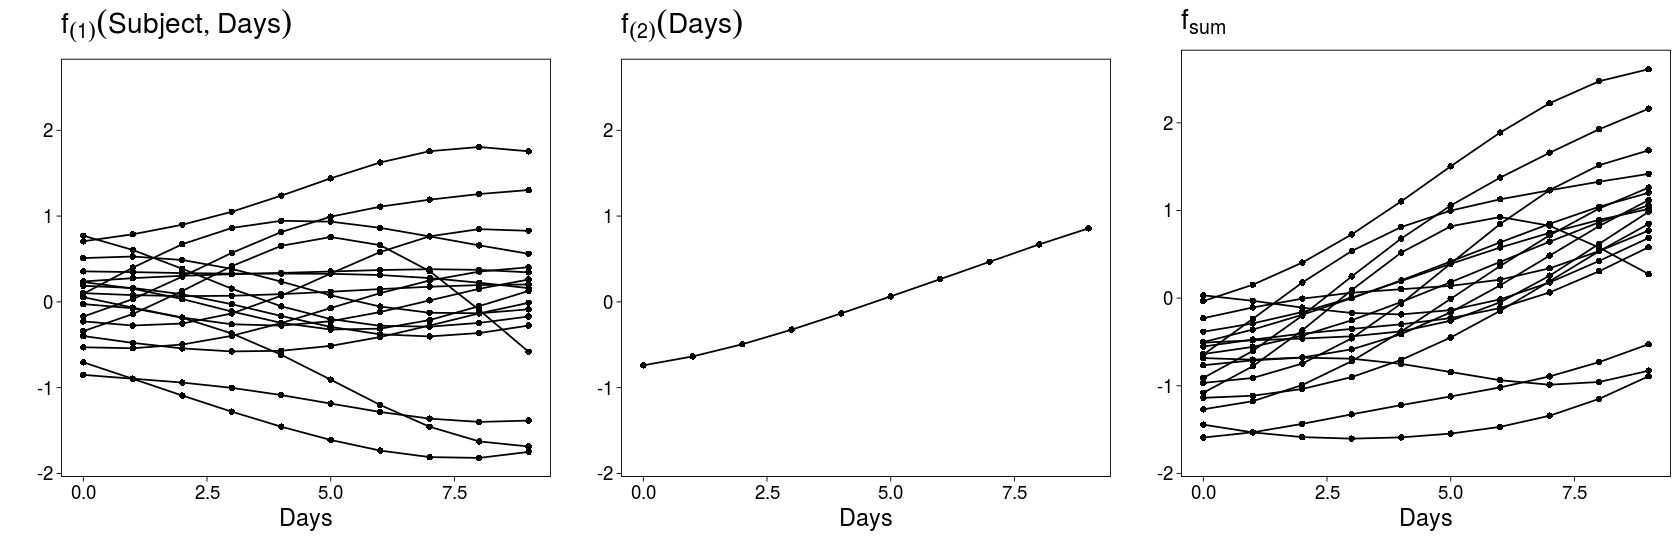

In [4]:
options(repr.plot.width=14, repr.plot.height=4.5) 
plot_components_posterior(fit, nrow = 1, ncol = 3, font_size = 14)

We see that the common time effect is quite linearly increasing, but the individual-specific time effects are very nonlinear for some individuals. We can visualize the posterior distribution of the sum of all components (red line = mean, ribbon edges = $\pm$ 2 x standard deviation), with the observations (black dots).

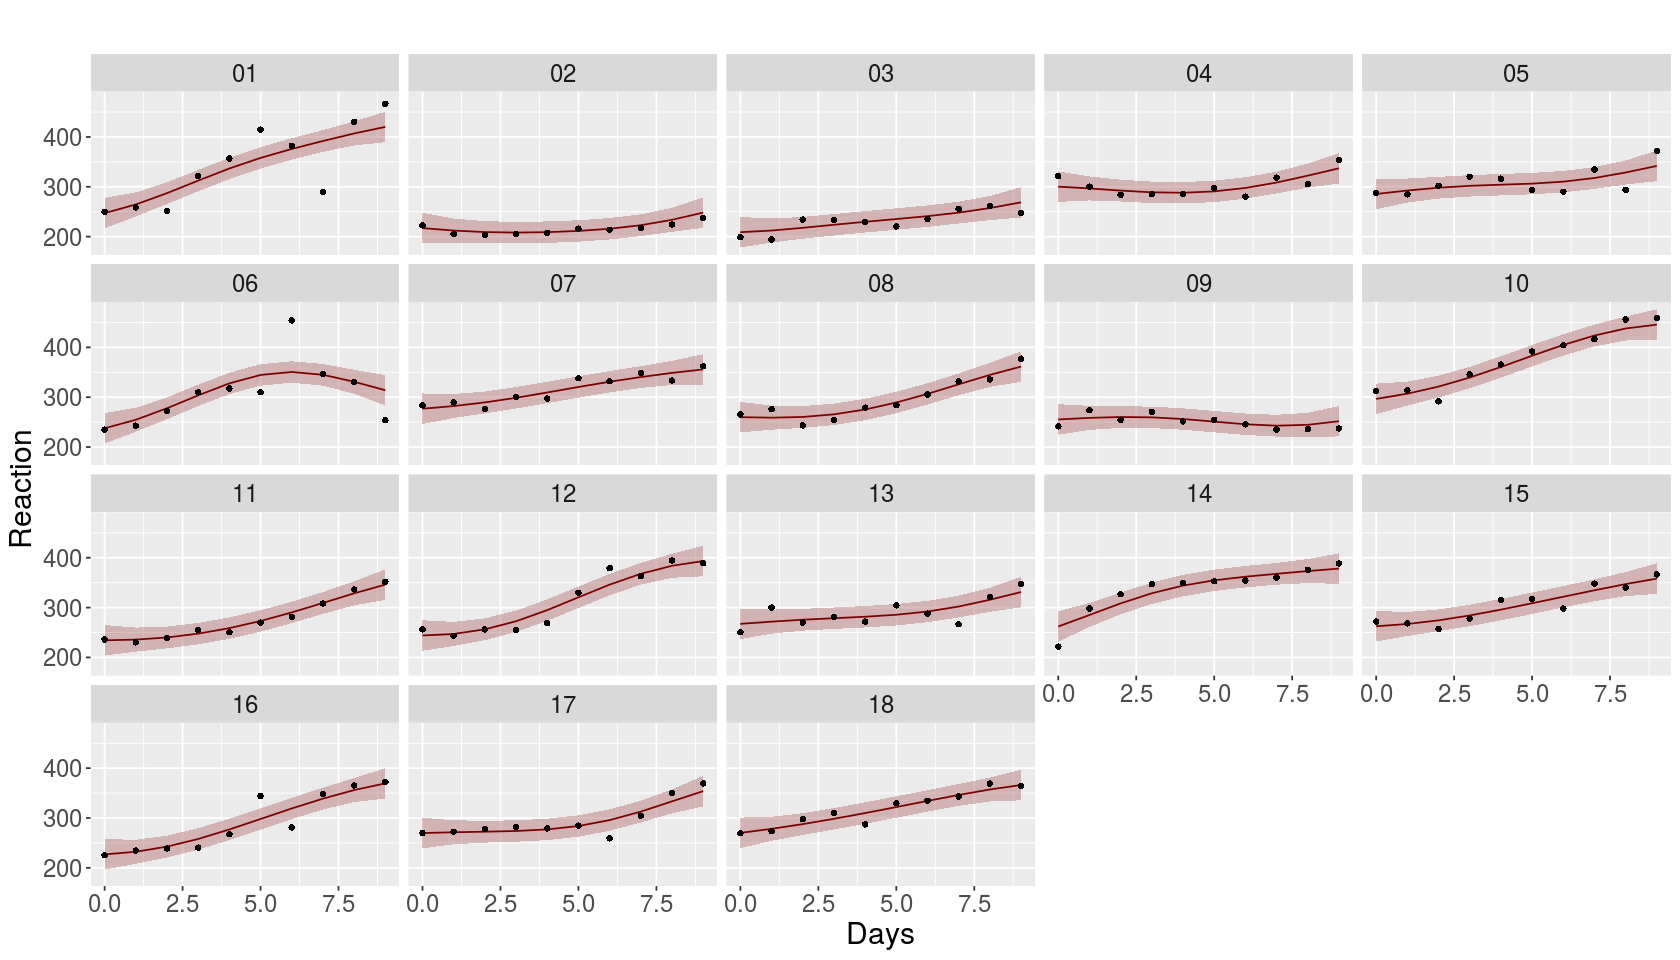

In [5]:
options(repr.plot.width=14, repr.plot.height=8)
plot_posterior_f(fit) + theme(text=element_text(size=18))

## References 
Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen C. Sing, Daniel P. Redmond, Michael B. Russo and Thomas J. Balkin (2003) Patterns of performance degradation and restoration during sleep restriction and subsequent recovery: a sleep dose-response study. *Journal of Sleep Research* **12**, 1--12.